<a href="https://colab.research.google.com/github/syibrahima31/Project-with-torch/blob/main/LInear%20Regression%20with%20torch%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np 
import torch 
import torch.optim as optim 
import torch.nn as nn 
import matplotlib.pyplot as plt 
from sklearn.datasets import  make_regression
from sklearn.model_selection import train_test_split


##  PREPARE DATASET 

In [173]:
X, y = make_regression(n_samples= 400, n_features=1, n_targets=1, noise = 10, random_state=49)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.33)


# convert datasets to tensor 
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(-1,1)


n_samples, n_features = X_train.shape 

##  PLOT TRAINING DATASET 



No handles with labels found to put in legend.


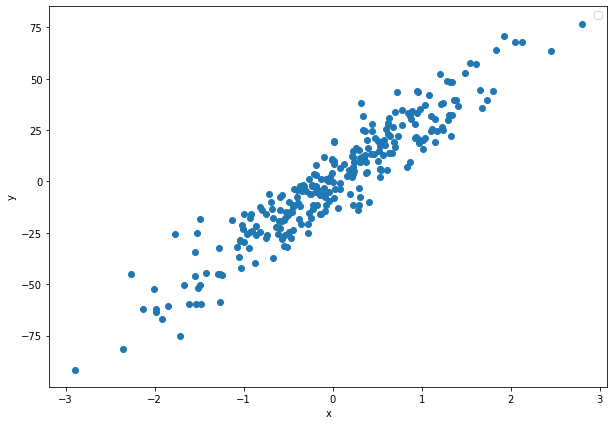

In [174]:
with torch.no_grad():
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()

##  CREATE THE MODEL  

In [175]:
class LinearRegression(nn.Module):


  def __init__(self, in_features, out_features):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(in_features=in_features, out_features=out_features)

  def forward(self, x):
    x = self.lin(x)
    return x 


In [176]:
model = LinearRegression(n_features, 1)

## PLOT BEFORE TRAINING 

No handles with labels found to put in legend.


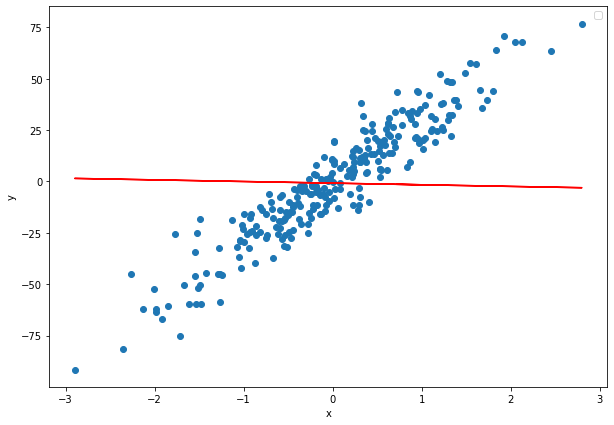

In [177]:
pred = model(X_train)
with torch.no_grad():
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train)
  plt.plot(X_train, pred, c= "red")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()

##  DEFINE OPTIMIZER AND LOSS

In [178]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

## 
 TRAINING LOOP 

In [179]:
n_iters = 100

for epoch in range(n_iters):
  # Forward pass 
  prediction = model(X_train)

  #  compute the loss function 

  loss = criterion(prediction, y_train)

  # compute the gradients 

  loss.backward()

  # update the wieghts 

  optimizer.step()

  # zero gradient 
  optimizer.zero_grad()

  if epoch % 10 == 0:
    w, b = model.parameters()
    print(f"{epoch+1}/{n_iters}  and the loss {loss}")

1/100  and the loss 894.1514282226562
11/100  and the loss 657.1561279296875
21/100  and the loss 490.24334716796875
31/100  and the loss 372.6764831542969
41/100  and the loss 289.858642578125
51/100  and the loss 231.51377868652344
61/100  and the loss 190.40621948242188
71/100  and the loss 161.44100952148438
81/100  and the loss 141.02992248535156
91/100  and the loss 126.6456069946289


## PLOT AFTER TRAINING 

No handles with labels found to put in legend.


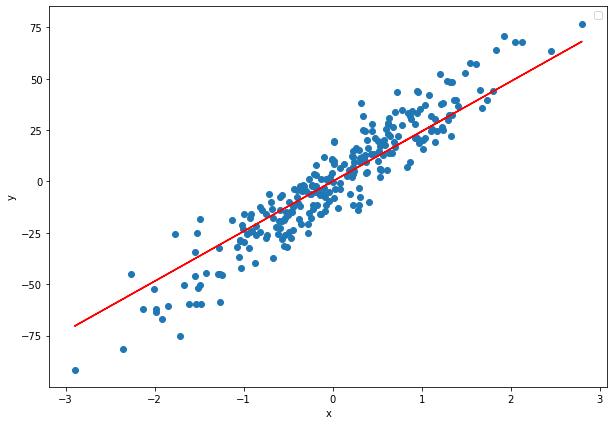

In [180]:
pred = model(X_train)
with torch.no_grad():
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train)
  plt.plot(X_train, pred, c= "red")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()